In [1]:
# This is all the neccesary packeges needed for machine learningnp/nimport cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# I use image_gen as a DATA AUGMENTATION METHOD - if , I have a lot of images , I train them for a while it starts to "over fit".
#Overfitting — Is whereby the model starts to see the specific details of the images in the training set rather than learning something general that can be transferred to the validation set.

from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anacon

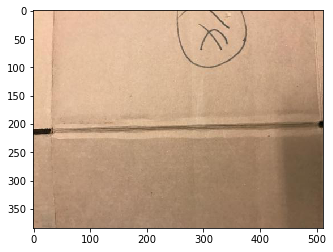

In [3]:
# VISUAL EXAMPLE OF A CARDBOARD

cardboard_example = cv2.imread('../Cardboard_Glass/train_cardboard_glass/cardboards/cardboard1.jpg')
cardboard_example= cv2.cvtColor(cardboard_example,cv2.COLOR_BGR2RGB)


plt.imshow(cardboard_example)

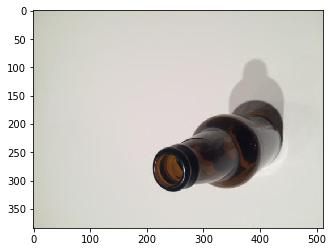

In [4]:
# VISUAL EXAMPLE OF A GLASS

glass_example = cv2.imread('../Cardboard_Glass/train_cardboard_glass/glass/glass1.jpg')
glass_example= cv2.cvtColor(glass_example,cv2.COLOR_BGR2RGB)


plt.imshow(glass_example)

We can see that the Augmented Image differs from the original image


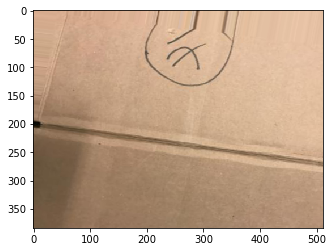

In [5]:
# VISUAL EXAMPLE OF IMAGE_GEN

plt.imshow(image_gen.random_transform(cardboard_example))
print('We can see that the Augmented Image differs from the original image')

We can see that the Augmented Image differs from the original image


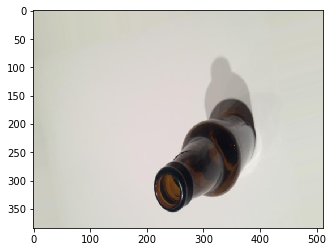

In [6]:
# VISUAL EXAMPLE OF IMAGE_GEN

plt.imshow(image_gen.random_transform(glass_example))
print('We can see that the Augmented Image differs from the original image')

In [7]:
###########################################################
# DESLARING A VARIABLE THAT WILL RESISE ALL THE IMAGES LATER
###########################################################
            ##width,height,channel
image_shape= (224,224,3)

# CREATING THE MODEL TO START LEARNING

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D #Maxpooling2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
__________

In [9]:
# TRAINING THE IMAGE

# TRAINING SET
train_cardboard_images = image_gen.flow_from_directory('train_cardboard_glass',
                                                      target_size=image_shape[:2],
                                                      batch_size=32,
                                                      class_mode='binary')

# VALIDATION SET
valid_cardboard_images = image_gen.flow_from_directory('valid_cardboard_glass',
                                                        target_size=image_shape[:2],
                                                        batch_size=32,
                                                        class_mode='binary')

# TEST SET
test_cardboard_images = image_gen.flow_from_directory('test_cardboard_glass',
                                                      target_size=image_shape[:2],
                                                      batch_size=32,
                                                      class_mode='binary')

Found 904 images belonging to 2 classes.
Found 904 images belonging to 2 classes.
Found 910 images belonging to 3 classes.


In [10]:
# results = model.fit_generator(train_cardboard_images,
#                               epochs=100,
#                               steps_per_epoch=150,
#                               validation_data=test_cardboard_images,# validate the data
#                               validation_steps=12)

In [11]:
# model.save('cardboard_glass_trained_100epochs.h5')

In [12]:
from tensorflow import keras
cardboard_glass_model = keras.models.load_model('cardboard_glass_trained_100epochs.h5')

 I am 100% sure this is cardboard with class of 0


{'cardboards': 0, 'glass': 1, 'trees': 2}

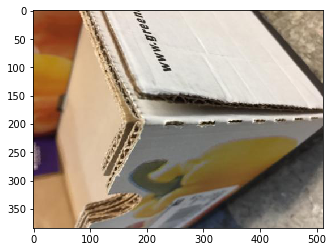

In [13]:
import numpy as np
from keras.preprocessing import image

# SEE THE TEST IMAGE
testimage = cv2.imread('test_cardboard_glass/cardboards/cardboard117.jpg')
testimage = cv2.cvtColor(testimage,cv2.COLOR_BGR2RGB)
plt.imshow(testimage)

# IMAGE LOCATION & RESISING TO FIT THE NEURAL NETWORK
cardboard117_test_img = 'test_cardboard_glass/cardboards/cardboard117.jpg'
cardboard117_test_img = image.load_img(cardboard117_test_img,target_size=(224,224))
# CONVERTING TO A NUMPY ARRAY
cardboard117_test_img = image.img_to_array(cardboard117_test_img)

cardboard117_test_img = np.expand_dims(cardboard117_test_img,axis=0) # position from where converted image array is read

cardboard117_test_img = cardboard117_test_img/255 # pixel color value to fraction

cardboard_acc = cardboard_glass_model.predict(cardboard117_test_img)
cardboard_class = cardboard_glass_model.predict_classes(cardboard117_test_img)

if round(cardboard_acc[0][0],10) == 0 :
    prediction = f'I am 100% sure this is cardboard with class of {cardboard_class[0][0]}'
    print(f' {prediction}')
elif round(cardboard_acc[0][0],10) == 1:
    prediction = f'I am 100% sure this is glass with a class of {cardboard_class[0][0]}'
    print(f' {prediction}')

# print(f'Image with an indice of {round(cardboard_acc[0][0],2)} and class {cardboard_class[0][0]}')
test_cardboard_images.class_indices

NameError: name 'predict_img' is not defined

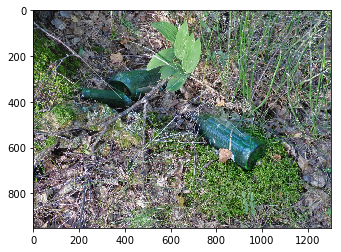

In [14]:
# SEE THE TEST IMAGE
testimage = cv2.imread('test_cardboard_glass/glass/glass503.jpg')
testimage = cv2.cvtColor(testimage,cv2.COLOR_BGR2RGB)
plt.imshow(testimage)

# IMAGE LOCATION & RESISING TO FIT THE NEURAL NETWORK
predictGlass503_img = 'test_cardboard_glass/glass/glass503.jpg'
predictGlass503_img = image.load_img(predictGlass503_img,target_size=(224,224))
# CONVERTING TO A NUMPY ARRAY
predictGlass503_img = image.img_to_array(predictGlass503_img)

predictGlass503_img = np.expand_dims(predictGlass503_img,axis=0) # position from where converted image array is read

predictGlass503_img = predict_img/255 # pixel color value to fraction

predict503_acc = cardboard_glass_model.predict(predictGlass503_img)
predictGlass503_class = cardboard_glass_model.predict_classes(predictGlass503_img)

if predict503_acc[0][0] == 0 :
    prediction = f'100% sure this is cardboard with class of {predictGlass503_class[0][0]}'
    print(f' {prediction}')
elif predict503_acc[0][0] == 1:
    prediction = f'100% sure this is glass with a class of {predictGlass503_class[0][0]}'
    print(f' {prediction}')
elif predict503_acc[0][0] <= 0.7 :
    print(f'Not 100% sure, but think it belongs to class of {predictGlass503_class[0][0]}')

test_cardboard_images.class_indices

In [ ]:
# SEE THE TEST IMAGE
testimage = cv2.imread('test_cardboard_glass/cardboards/cardboard405.jpg')
testimage = cv2.cvtColor(testimage,cv2.COLOR_BGR2RGB)
plt.imshow(testimage)

# IMAGE LOCATION & RESISING TO FIT THE NEURAL NETWORK
predictCardboard405_img = 'test_cardboard_glass/cardboards/cardboard405.jpg'
predictCardboard405_img = image.load_img(predictCardboard405_img,target_size=(224,224))
# CONVERTING TO A NUMPY ARRAY
predictCardboard405_img = image.img_to_array(predictCardboard405_img)

predictCardboard405_img = np.expand_dims(predictCardboard405_img,axis=0) # position from where converted image array is read

predictCardboard405_img = predictCardboard405_img/255 # pixel color value to fraction

predictCardboard405_acc = cardboard_glass_model.predict(predictCardboard405_img)
predictCardboard405_class = cardboard_glass_model.predict_classes(predictCardboard405_img)

if predictCardboard405_acc[0][0] == 0 :
    prediction = f'100% sure this is cardboard with class of {predictCardboard405_class[0][0]}'
    print(f' {prediction}')
elif predictCardboard405_acc[0][0] == 1:
    prediction = f'100% sure this is glass with a class of {predictCardboard405_class[0][0]}'
    print(f' {prediction}')
elif predictCardboard405_acc[0][0] <= 0.7 :
    print(f'Not 100% sure, but it has an indice of {round(predictCardboard405_acc[0][0],5)} think it belongs to class of {predictCardboard405_class[0][0]}')

# print(f'Image with an indice of {round(cardboard_acc[0][0],2)} and class {cardboard_class[0][0]}')
test_cardboard_images.class_indices

In [ ]:
# SEE THE TEST IMAGE
testimage = cv2.imread('test_cardboard_glass/trees/tree1.jpg')
testimage = cv2.cvtColor(testimage,cv2.COLOR_BGR2RGB)
plt.imshow(testimage)

# IMAGE LOCATION & RESISING TO FIT THE NEURAL NETWORK
predict_img = 'test_cardboard_glass/trees/tree1.jpg'
predict_img = image.load_img(predict_img,target_size=(224,224))
# CONVERTING TO A NUMPY ARRAY
predict_img = image.img_to_array(predict_img)

predict_img = np.expand_dims(predict_img,axis=0) # position from where converted image array is read

predict_img = predict_img/255 # pixel color value to fraction

predict_acc = cardboard_glass_model.predict(predict_img)
predict_class = cardboard_glass_model.predict_classes(predict_img)
predict_class_name = predict_acc.argmax(axis=-1)

# if cardboard_acc[0][0] == 0 :
#     prediction = f'100% sure this is cardboard with class of {cardboard_class[0][0]}'
#     print(f' {prediction}')
# elif cardboard_acc[0][0] == 1:
#     prediction = f'100% sure this is glass with a class of {cardboard_class[0][0]}'
#     print(f' {prediction}')
# elif cardboard_acc[0][0] <= 0.7 :
#     print(f'Not 100% sure, but think it belongs to class of {predict_class[0][0]}')
# elif 

print(f'Image with an indice of {predict_acc[0][0]} and class {predict_class_name}')
test_cardboard_images.class_indices

In [ ]:
# SEE THE TEST IMAGE
testimage = cv2.imread('test_cardboard_glass/trees/tree1.jpg')
testimage = cv2.cvtColor(testimage,cv2.COLOR_BGR2RGB)
plt.imshow(testimage)

# IMAGE LOCATION & RESISING TO FIT THE NEURAL NETWORK
predict_img = 'test_cardboard_glass/trees/tree1.jpg'
predict_img = image.load_img(predict_img,target_size=(224,224))
# CONVERTING TO A NUMPY ARRAY
predict_img = image.img_to_array(predict_img)

predict_img = np.expand_dims(predict_img,axis=0) # position from where converted image array is read

predict_img = predict_img/255 # pixel color value to fraction

predict_acc = cardboard_glass_model.predict(predict_img)
predict_class = cardboard_glass_model.predict_classes(predict_img)

# if cardboard_acc[0][0] == 0 :
#     prediction = f'100% sure this is cardboard with class of {cardboard_class[0][0]}'
#     print(f' {prediction}')
# elif cardboard_acc[0][0] == 1:
#     prediction = f'100% sure this is glass with a class of {cardboard_class[0][0]}'
#     print(f' {prediction}')
# elif cardboard_acc[0][0] <= 0.7 :
#     print(f'Not 100% sure, but think it belongs to class of {predict_class[0][0]}')
# elif 

print(f'Image with an indice of {predict_acc[0][0]} and class {predict_class}')
test_cardboard_images.class_indices.keys()